Epoch 1/50
7/7 [==============================] - 2s 98ms/step - loss: 1.0467 - accuracy: 0.3241 - val_loss: 0.9470 - val_accuracy: 0.4167
Epoch 2/50
7/7 [==============================] - 0s 22ms/step - loss: 0.8997 - accuracy: 0.7130 - val_loss: 0.8599 - val_accuracy: 0.7500
Epoch 3/50
7/7 [==============================] - 0s 21ms/step - loss: 0.7805 - accuracy: 0.8148 - val_loss: 0.7804 - val_accuracy: 0.7500
Epoch 4/50
7/7 [==============================] - 0s 24ms/step - loss: 0.6775 - accuracy: 0.8241 - val_loss: 0.7030 - val_accuracy: 0.8333
Epoch 5/50
7/7 [==============================] - 0s 50ms/step - loss: 0.5801 - accuracy: 0.8241 - val_loss: 0.6363 - val_accuracy: 0.8333
Epoch 6/50
7/7 [==============================] - 0s 32ms/step - loss: 0.5006 - accuracy: 0.8148 - val_loss: 0.5767 - val_accuracy: 0.8333
Epoch 7/50
7/7 [==============================] - 0s 46ms/step - loss: 0.4367 - accuracy: 0.8333 - val_loss: 0.5304 - val_accuracy: 0.9167
Epoch 8/50
7/7 [===========

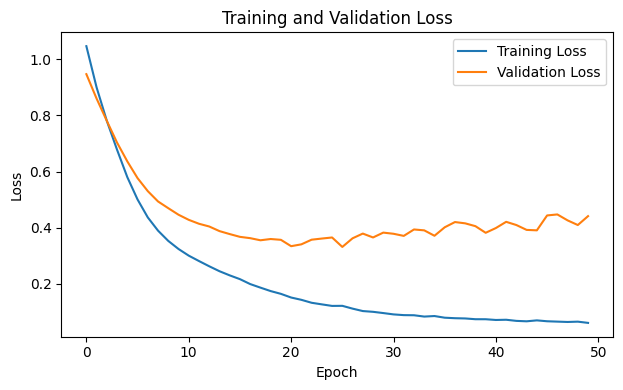

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the FFN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes for Iris dataset, softmax activation

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}")

# Plot loss and epoch graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
